Mega Cap Tech LSTM Prediction Model

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf


# For time stamps
from datetime import datetime

Build Dataframes for historical price and volume data

In [48]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'TSLA', 'AMZN']

# Set up End and Start times 
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Dictionary to store DataFrames for each stock
tech_data = {}

# yahoo finance data and setting as a DataFrame
for stock in tech_list:
    # Fetch data
    data = yf.download(stock, start=start, end=end)
    
    # Store data in dictionary
    tech_data[stock] = data

# Print the first few rows of each DataFrame
for stock, data in tech_data.items():
    print(f"Data for {stock}:")
    print(data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-30  176.960007  178.990005  176.570007  177.300003  176.363388   
2023-05-31  177.330002  179.350006  176.759995  177.250000  176.313644   
2023-06-01  177.699997  180.119995  176.929993  180.089996  179.138626   
2023-06-02  181.029999  181.779999  179.259995  180.949997  179.994095   
2023-06-05  182.630005  184.949997  178.039993  179.580002  178.631348   

               Volume  
Date                   
2023-05-30   55964400  
2023-05-31   99625300  
2023-06-01   68901800  
2023-06-02   61945900  
2023-06-05  121946500  
Data for GOOG:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-30  126.290001  126.379997  122.889999  124.639999  124.639999   
2023-05-31  123.699997  124.900002  123.099998  123.370003  1

In [49]:
# List of company names corresponding to the stocks
company_name = ['Apple', 'Google', 'Tesla', 'Amazon']

company_list = [tech_data[stock] for stock in tech_list]

# Add company_name as a column to each DataFrame
for company, name in zip(company_list, company_name):
    company["company_name"] = name

# Concatenate the DataFrames in company_list
df = pd.concat(company_list, axis=0)

# Sort the DataFrame by index (date)
df.sort_index(inplace=True)

# Print the last 10 rows of the DataFrame
print(df.tail(10))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-23  190.979996  191.000000  186.630005  186.880005  186.880005   
2024-05-23  178.779999  179.910004  174.539993  175.059998  175.059998   
2024-05-24  174.839996  180.080002  173.729996  179.240005  179.240005   
2024-05-24  181.649994  182.440002  180.300003  180.750000  180.750000   
2024-05-24  176.520004  177.304001  175.199997  176.330002  176.330002   
2024-05-24  188.820007  190.580002  188.039993  189.979996  189.979996   
2024-05-28  175.729996  178.509995  175.679993  177.509995  177.509995   
2024-05-28  191.531998  192.990005  189.100006  189.600006  189.600006   
2024-05-28  176.300995  178.249893  173.160004  175.889999  175.889999   
2024-05-28  179.850006  181.850006  179.490005  181.419907  181.419907   

              Volume company_name  
Date                               
2024-05-23  51005900        Apple  
202

In [50]:
# Access the DataFrame for AAPL from the tech_data dictionary
aapl_data = tech_data['AAPL']

# Generate summary statistics
summary_stats = aapl_data.describe()

# Print the summary statistics
print(summary_stats)


             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   182.233355  183.712590  180.836693  182.299124  181.739506   
std      8.498694    8.307932    8.490126    8.440192    8.368132   
min    165.350006  166.399994  164.080002  165.000000  164.776505   
25%    175.244995  177.025002  173.660004  175.280006  174.800789   
50%    182.350006  184.149994  180.929993  182.520004  182.169510   
75%    189.729996  190.854996  188.590004  189.705002  189.201630   
max    198.020004  199.619995  197.000000  198.110001  197.589523   

             Volume  
count  2.510000e+02  
mean   5.822057e+07  
std    1.886118e+07  
min    2.404830e+07  
25%    4.670805e+07  
50%    5.342310e+07  
75%    6.515930e+07  
max    1.632241e+08  


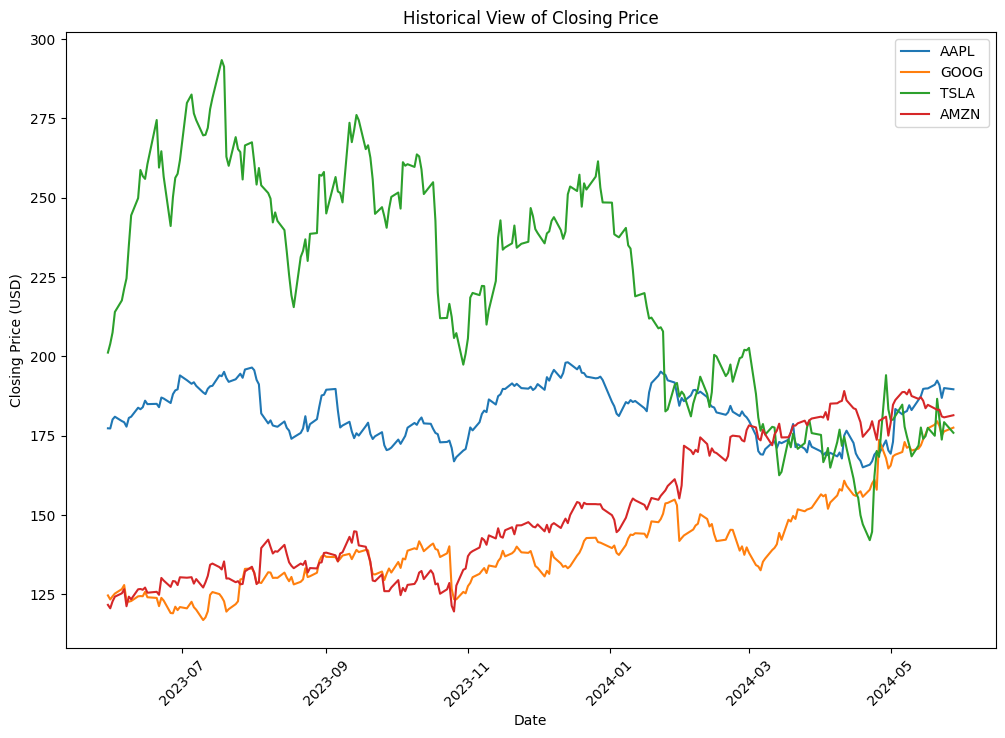

In [51]:
# Let's see a historical view of the closing price
plt.figure(figsize=(12, 8))

# Plot the closing price for each stock
for stock in tech_list:
    plt.plot(tech_data[stock].index, tech_data[stock]['Close'], label=stock)

# Set plot title and labels
plt.title('Historical View of Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


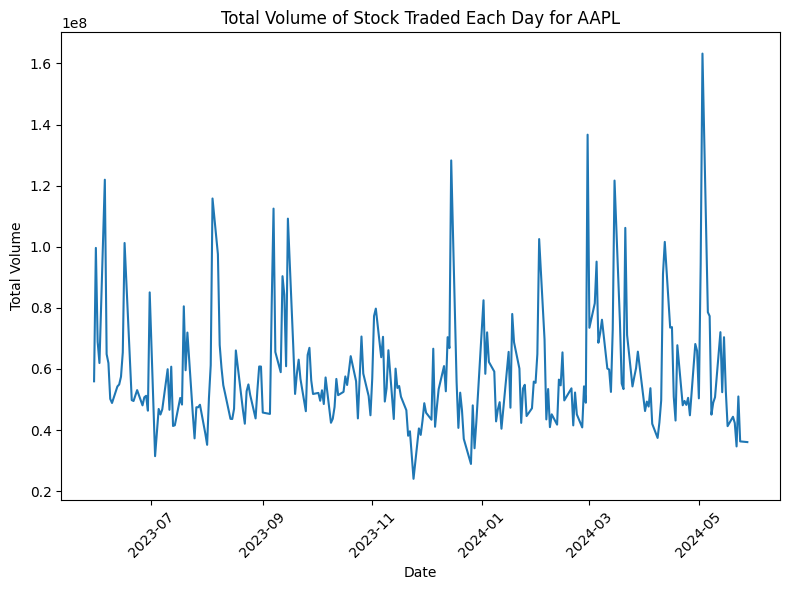

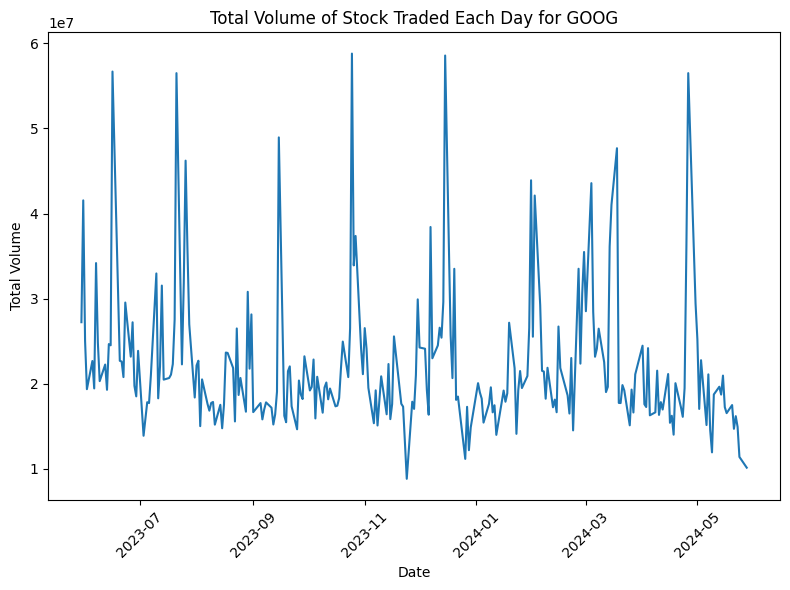

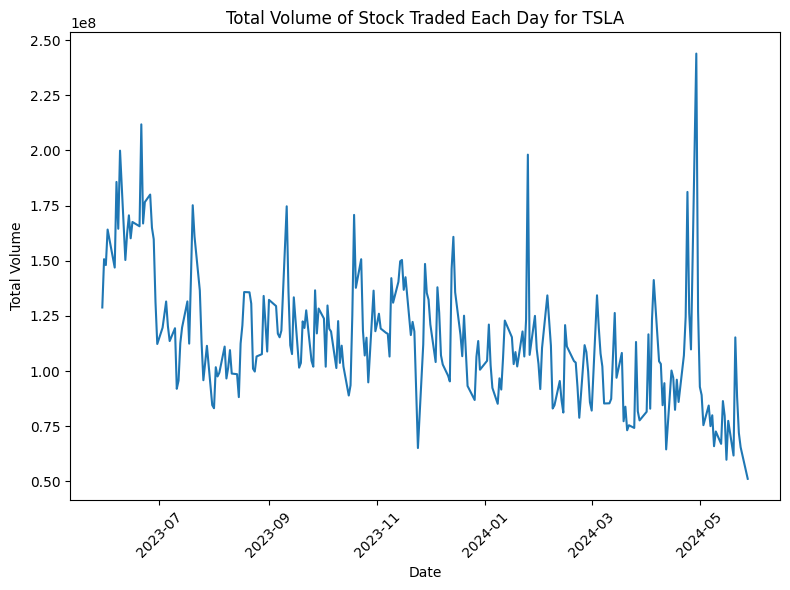

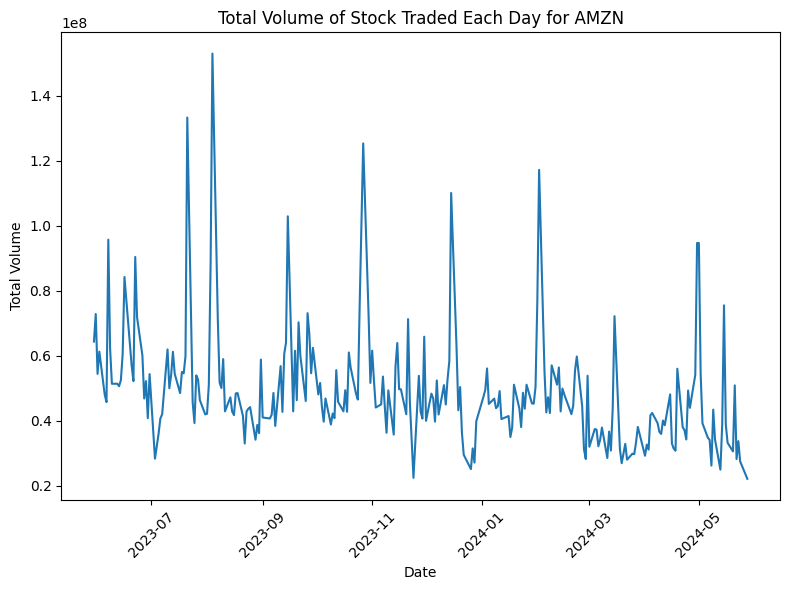

In [52]:
# Plot the total volume of stock traded each day for each stock separately
for stock in tech_list:
    plt.figure(figsize=(8, 6))
    
    # Plot the total volume of stock traded each day for the current stock
    plt.plot(tech_data[stock].index, tech_data[stock]['Volume'])
    
    # Set plot title and labels
    plt.title(f'Total Volume of Stock Traded Each Day for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Total Volume')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show plot
    plt.tight_layout()  # Adjust layout to prevent overlap of titles
    plt.show()


Moving Averages 

In [53]:
# Moving averages to calculate
ma_day = [10, 20, 50]

# Calculate moving averages for each stock separately
for stock in tech_list:
    for ma in ma_day:
        # Add moving average to the DataFrame
        tech_data[stock][f'MA_{ma}'] = tech_data[stock]['Close'].rolling(window=ma).mean()

# Print the last few rows of each stock's DataFrame to verify the moving averages are added
for stock in tech_list:
    print(f"Last few rows of DataFrame for {stock}:")
    print(tech_data[stock].tail())
  


Last few rows of DataFrame for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-21  191.089996  192.729996  190.919998  192.350006  192.350006   
2024-05-22  192.270004  192.820007  190.270004  190.899994  190.899994   
2024-05-23  190.979996  191.000000  186.630005  186.880005  186.880005   
2024-05-24  188.820007  190.580002  188.039993  189.979996  189.979996   
2024-05-28  191.531998  192.990005  189.100006  189.600006  189.600006   

              Volume company_name       MA_10       MA_20     MA_50  
Date                                                                 
2024-05-21  42309400        Apple  187.689000  180.937501  174.9092  
2024-05-22  34648500        Apple  188.504999  182.031500  175.2626  
2024-05-23  51005900        Apple  188.735999  182.881001  175.5776  
2024-05-24  36294600        Apple  189.428998  183.915000  175.9172  
2024-05-28  36070037    

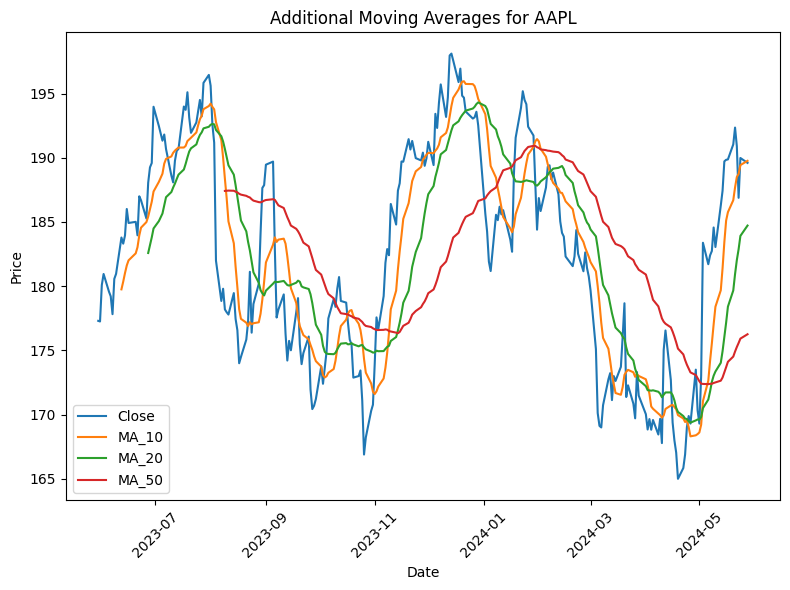

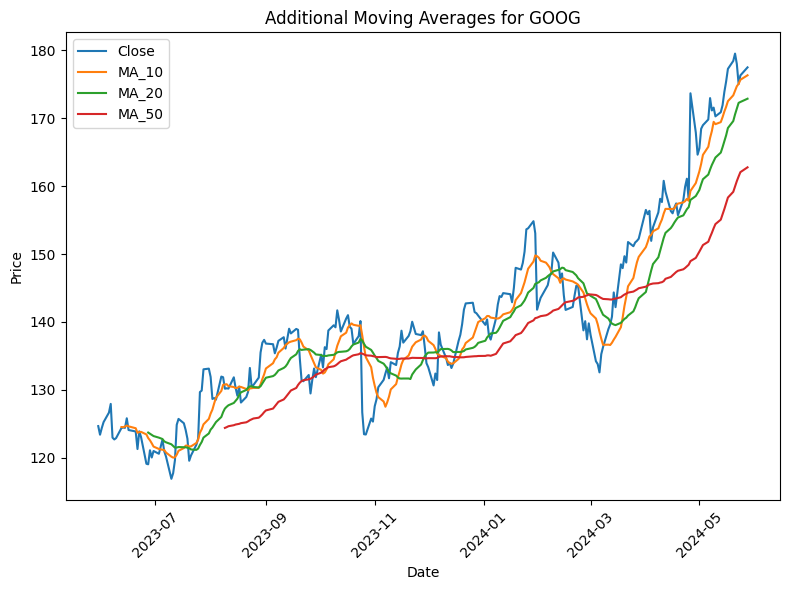

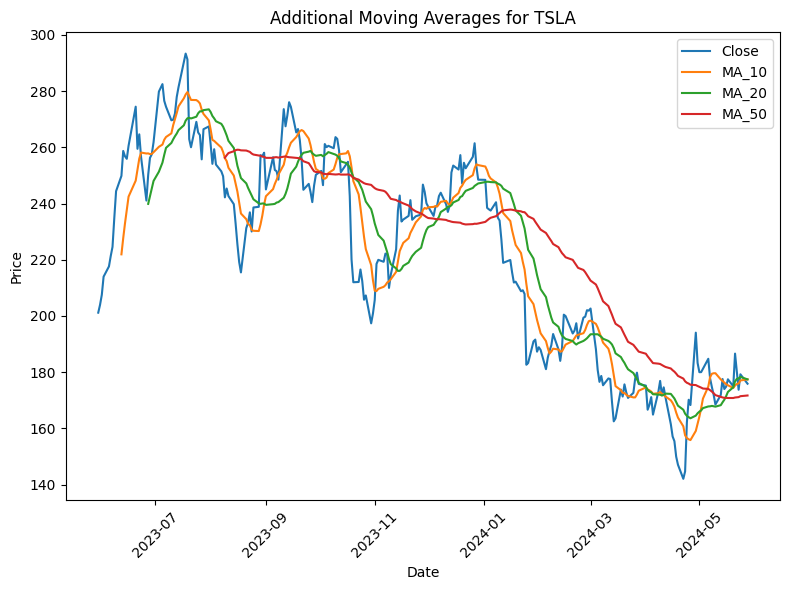

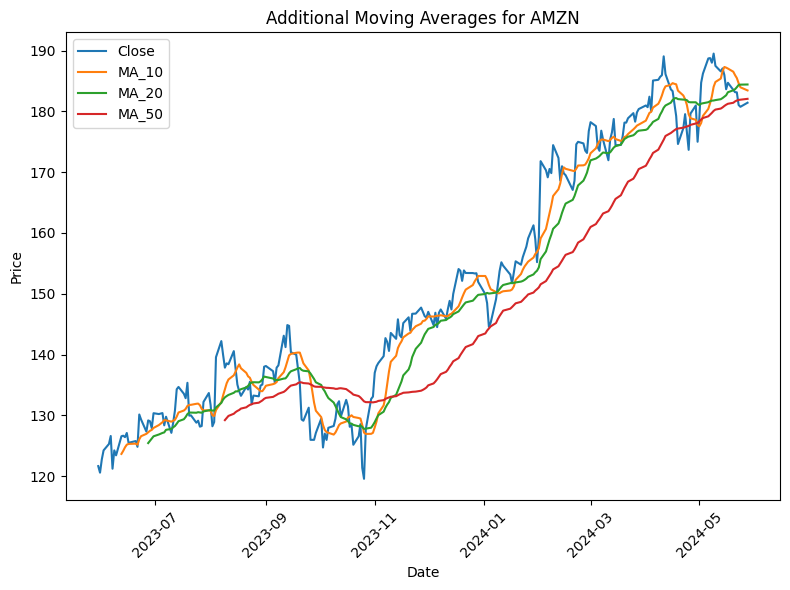

In [54]:
# Plot additional moving averages for each stock separately
for stock in tech_list:
    plt.figure(figsize=(8, 6))
    
    # Plot the closing price
    plt.plot(tech_data[stock].index, tech_data[stock]['Close'], label='Close')
    
    # Plot additional moving averages
    for ma in ma_day:
        plt.plot(tech_data[stock].index, tech_data[stock][f'MA_{ma}'], label=f'MA_{ma}')
    
    # Set plot title and labels
    plt.title(f'Additional Moving Averages for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    
    # Add legend
    plt.legend()
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show plot
    plt.tight_layout()  # Adjust layout to prevent overlap of titles
    plt.show()


In [55]:
# Calculate daily returns for each stock separately
for stock in tech_list:
    # Add a new column for daily returns to the DataFrame
    tech_data[stock]['Daily_Return'] = tech_data[stock]['Close'].pct_change()

# Print the last few rows of each stock's DataFrame to verify the daily returns are added
for stock in tech_list:
    print(f"Last few rows of DataFrame for {stock}:")
    print(tech_data[stock].head())
   


Last few rows of DataFrame for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-30  176.960007  178.990005  176.570007  177.300003  176.363388   
2023-05-31  177.330002  179.350006  176.759995  177.250000  176.313644   
2023-06-01  177.699997  180.119995  176.929993  180.089996  179.138626   
2023-06-02  181.029999  181.779999  179.259995  180.949997  179.994095   
2023-06-05  182.630005  184.949997  178.039993  179.580002  178.631348   

               Volume company_name  MA_10  MA_20  MA_50  Daily_Return  
Date                                                                   
2023-05-30   55964400        Apple    NaN    NaN    NaN           NaN  
2023-05-31   99625300        Apple    NaN    NaN    NaN     -0.000282  
2023-06-01   68901800        Apple    NaN    NaN    NaN      0.016023  
2023-06-02   61945900        Apple    NaN    NaN    NaN      0.004775  
2023-06-05  

Exploratory Analysis

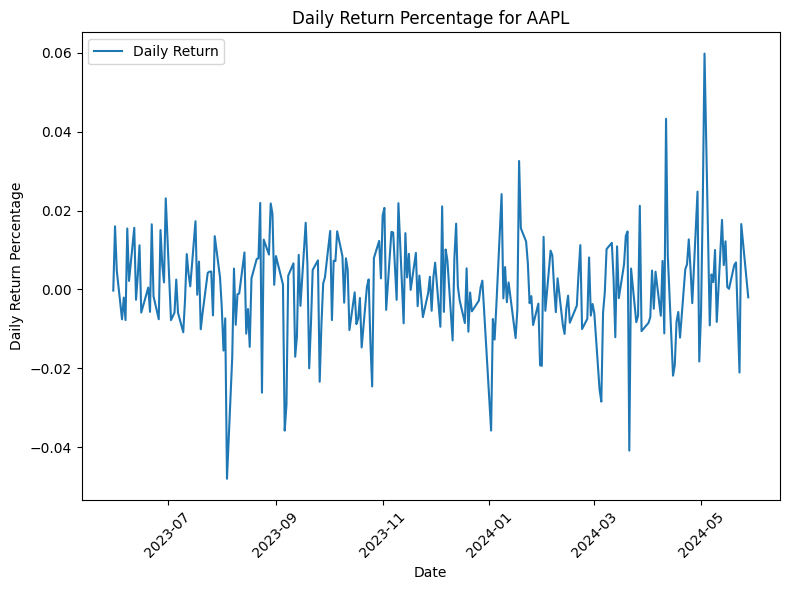

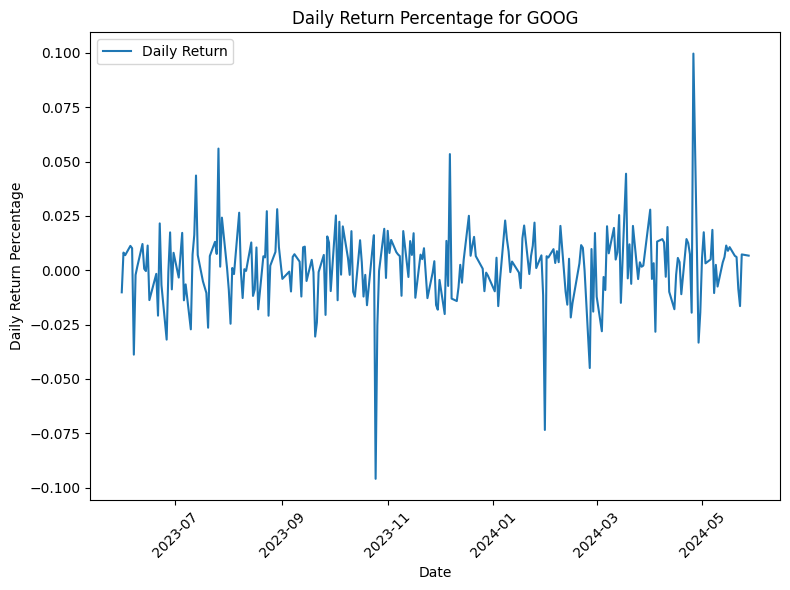

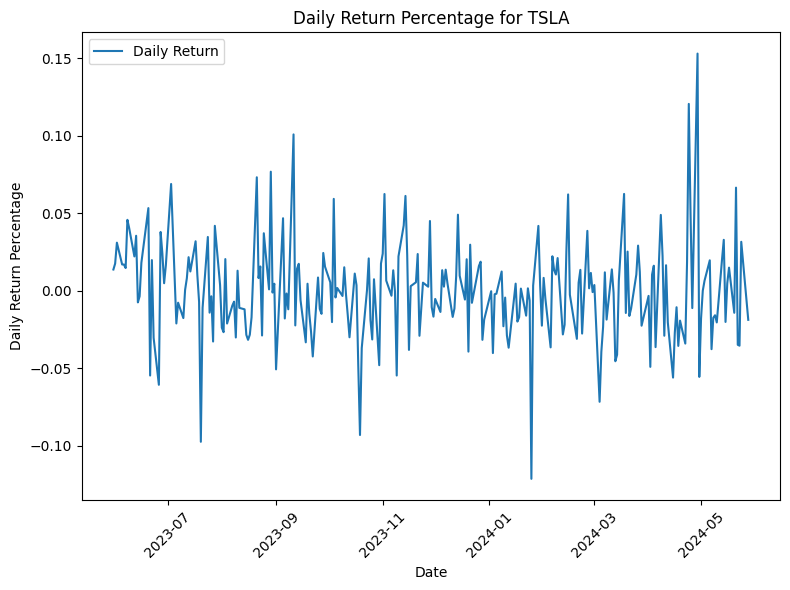

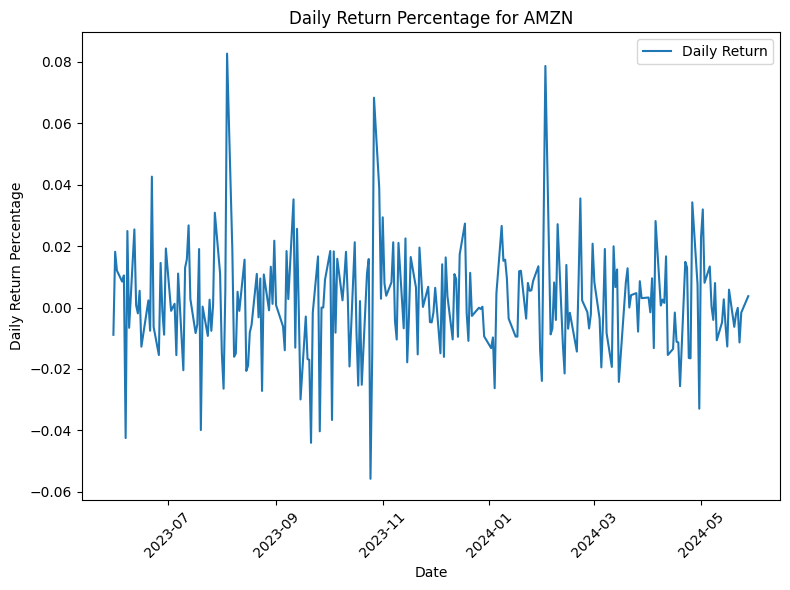

In [56]:
# Plot daily return percentage for each stock separately
for stock in tech_list:
    plt.figure(figsize=(8, 6))
    
    # Plot the daily return percentage
    plt.plot(tech_data[stock].index, tech_data[stock]['Daily_Return'], label='Daily Return')
    
    # Set plot title and labels
    plt.title(f'Daily Return Percentage for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Daily Return Percentage')
    
    # Add legend
    plt.legend()
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show plot
    plt.tight_layout()  # Adjust layout to prevent overlap of titles
    plt.show()

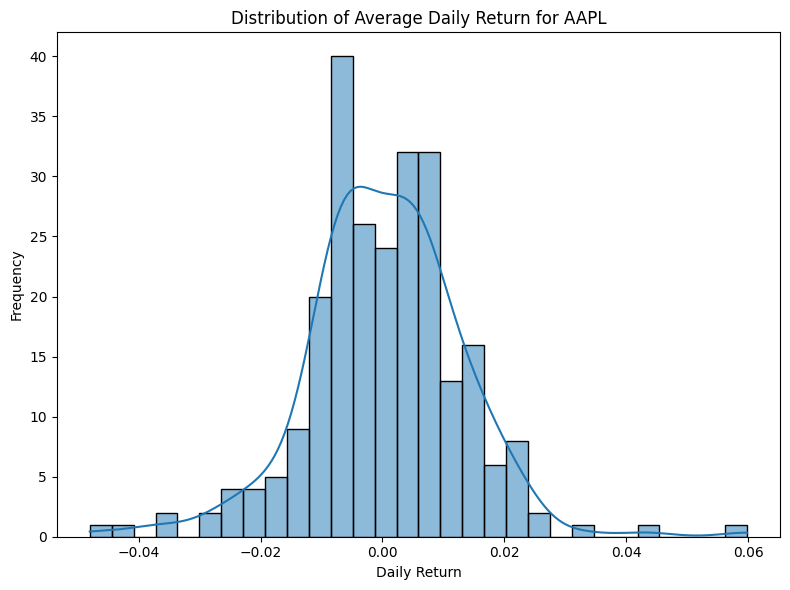

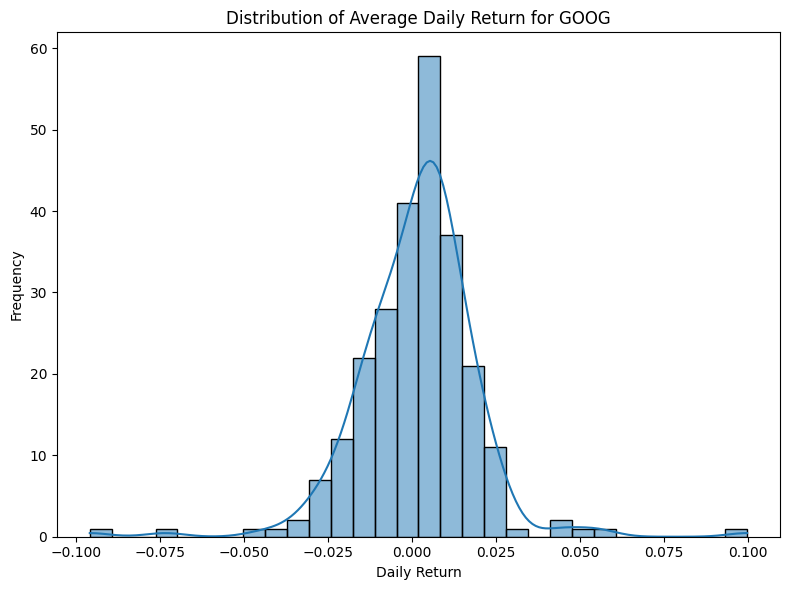

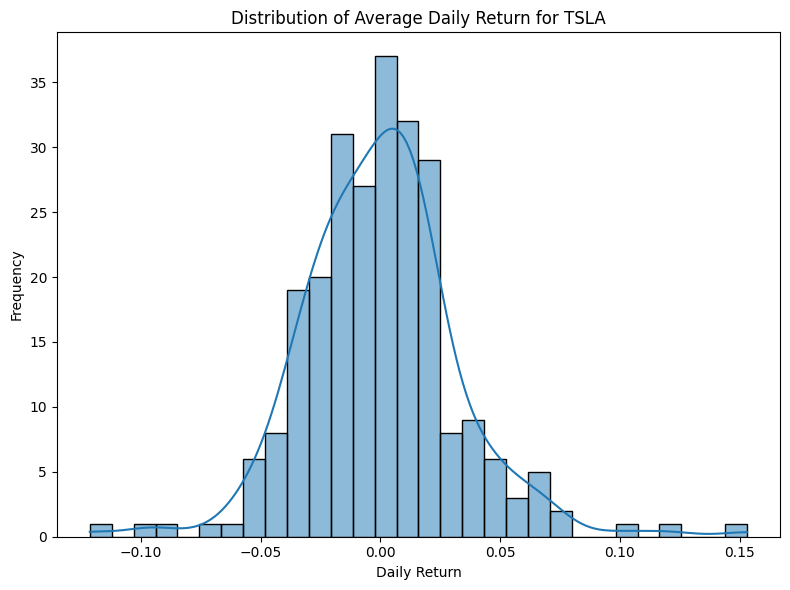

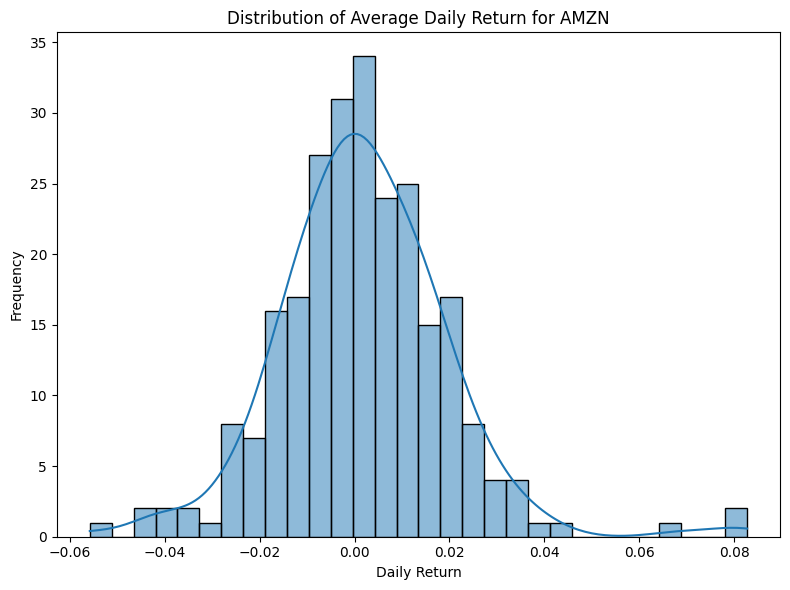

In [57]:
# Plot histogram and KDE for average daily return for each stock separately
for stock in tech_list:
    plt.figure(figsize=(8, 6))
    
    # Drop NaN values from the daily return column
    daily_return_without_nan = tech_data[stock]['Daily_Return'].dropna()
    
    # Plot histogram and KDE
    sns.histplot(daily_return_without_nan, kde=True, bins=30)
    
    # Set plot title and labels
    plt.title(f'Distribution of Average Daily Return for {stock}')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    
    # Show plot
    plt.tight_layout()
    plt.show()

                  AAPL        GOOG        TSLA        AMZN
Date                                                      
2023-05-30  177.300003  124.639999  201.160004  121.660004
2023-05-31  177.250000  123.370003  203.929993  120.580002
2023-06-01  180.089996  124.370003  207.520004  122.769997
2023-06-02  180.949997  125.230003  213.970001  124.250000
2023-06-05  179.580002  126.629997  217.610001  125.300003
                AAPL      GOOG      TSLA      AMZN
Date                                              
2023-05-30       NaN       NaN       NaN       NaN
2023-05-31 -0.000282 -0.010189  0.013770 -0.008877
2023-06-01  0.016023  0.008106  0.017604  0.018162
2023-06-02  0.004775  0.006915  0.031081  0.012055
2023-06-05 -0.007571  0.011179  0.017012  0.008451


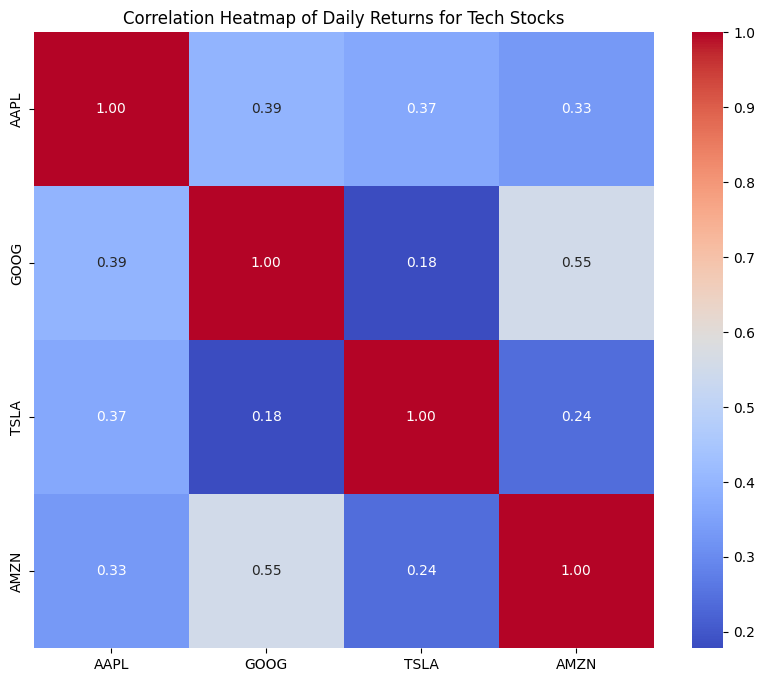

In [58]:
# Initialize an empty DataFrame to store close prices for all stocks
close_prices_df = pd.DataFrame()

# Add the 'Close' column for each stock to the DataFrame
for stock in tech_list:
    close_prices_df[stock] = tech_data[stock]['Close']

# Print the first few rows of the DataFrame to verify the data
print(close_prices_df.head())

# Make a new tech returns DataFrame
tech_rets = close_prices_df.pct_change()
print(tech_rets.head())

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(tech_rets.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Daily Returns for Tech Stocks')
plt.show()

<Axes: >

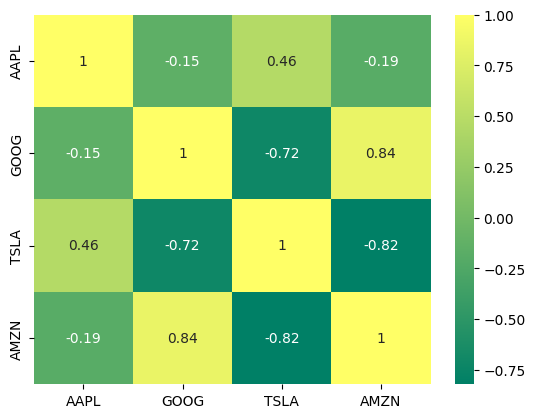

In [59]:
sns.heatmap(close_prices_df.corr(), annot=True, cmap='summer')

Risk Analysis 

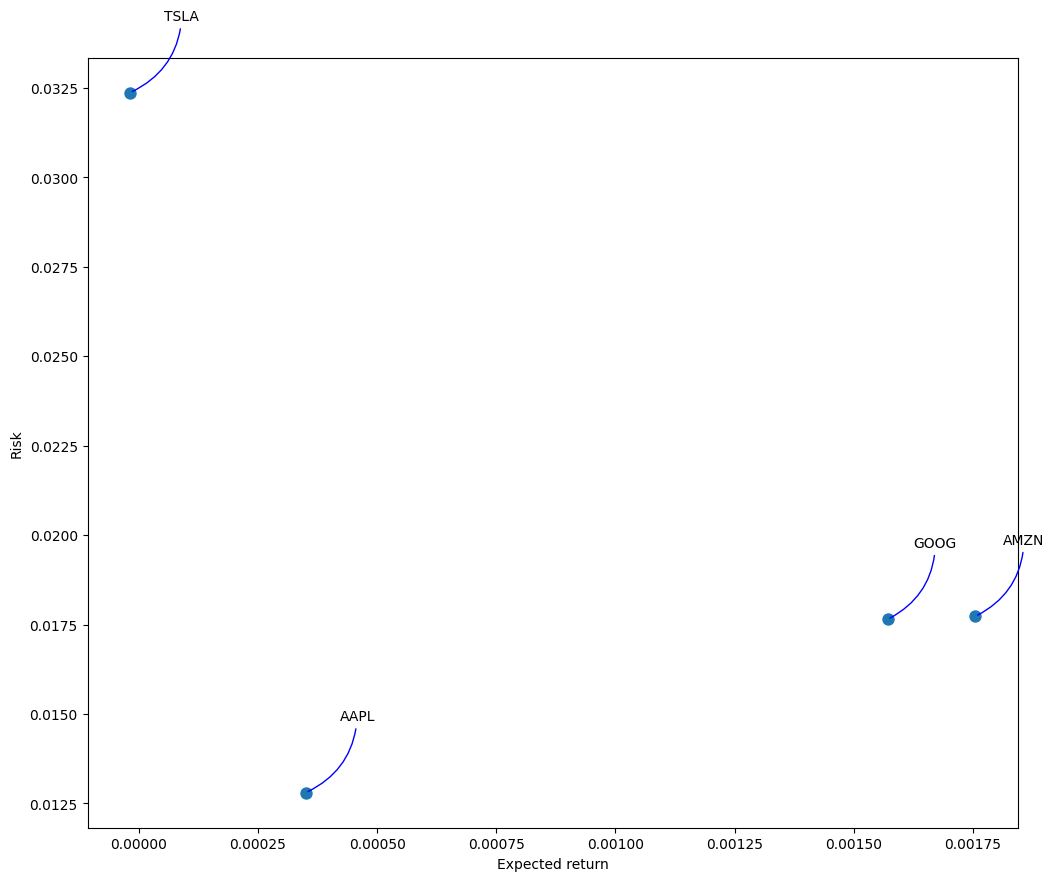

In [60]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

LSTM Model  

In [61]:
# Select a single stock (AAPL) for LSTM model
df = tech_data['AAPL']
df = df[['Close', 'Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_20', 'MA_50']]
df.fillna(df.mean(), inplace=True)
df.head()

/var/folders/60/3nkvzscs6tbfw07943dj271h0000gn/T/ipykernel_3136/2794425789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)


,Close,Open,High,Low,Volume,MA_10,MA_20,MA_50
Date,,,,,,,,
2023-05-30,177.300003,176.960007,178.990005,176.570007,55964400,182.221384,182.122427,182.20005
2023-05-31,177.250000,177.330002,179.350006,176.759995,99625300,182.221384,182.122427,182.20005
2023-06-01,180.089996,177.699997,180.119995,176.929993,68901800,182.221384,182.122427,182.20005
2023-06-02,180.949997,181.029999,181.779999,179.259995,61945900,182.221384,182.122427,182.20005
2023-06-05,179.580002,182.630005,184.949997,178.039993,121946500,182.221384,182.122427,182.20005


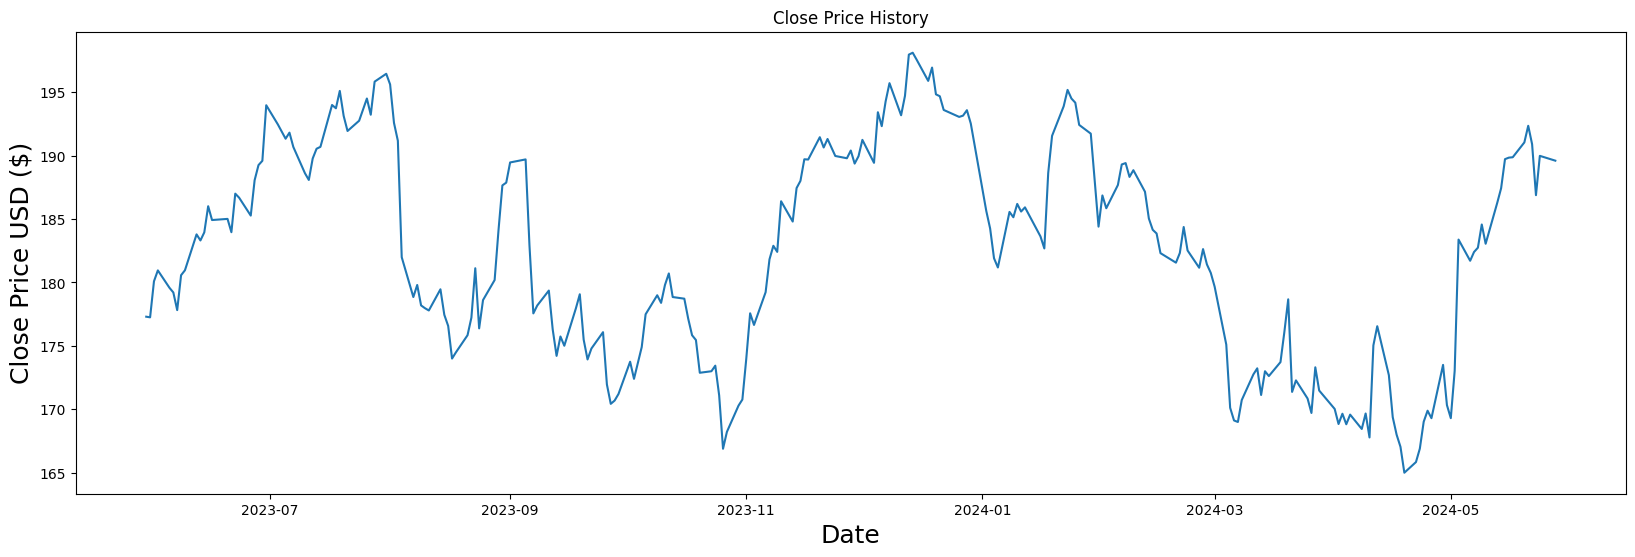

In [62]:
plt.figure(figsize=(20,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [63]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

scaled_data

array([[0.37148906, 0.35537194, 0.3789889 , ..., 0.50323245, 0.51128641,
        0.52971756],
       [0.36997885, 0.36669717, 0.38982576, ..., 0.50323245, 0.51128641,
        0.52971756],
       [0.45575343, 0.37802239, 0.41300424, ..., 0.50323245, 0.51128641,
        0.52971756],
       ...,
       [0.66082768, 0.78451151, 0.74051792, ..., 0.73882531, 0.54170844,
        0.17276989],
       [0.7544547 , 0.71839616, 0.72787499, ..., 0.76388676, 0.58317624,
        0.19107421],
       [0.74297812, 0.80140781, 0.80042175, ..., 0.77589315, 0.61546019,
        0.20937854]])

In [64]:
# Training Data 
training_data_len = int(np.ceil(len(scaled_data) * .8))
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i])
    y_train.append(train_data[i, 0])  # Predicting the 'Close' price

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = df['Close'][training_data_len:].values

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i])

# Convert the x_test to a numpy array 
x_test = np.array(x_test)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

print(x_train.shape)

(141, 60, 8)


In [65]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], x_train.shape[2])))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

141/141 [==============================] - 3s 12ms/step - loss: 0.0362


In [67]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], df.shape[1] - 1))], axis=1))[:, 0]

2/2 [==============================] - 0s 8ms/step


In [68]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.082464327449284

/var/folders/60/3nkvzscs6tbfw07943dj271h0000gn/T/ipykernel_3136/3290077316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


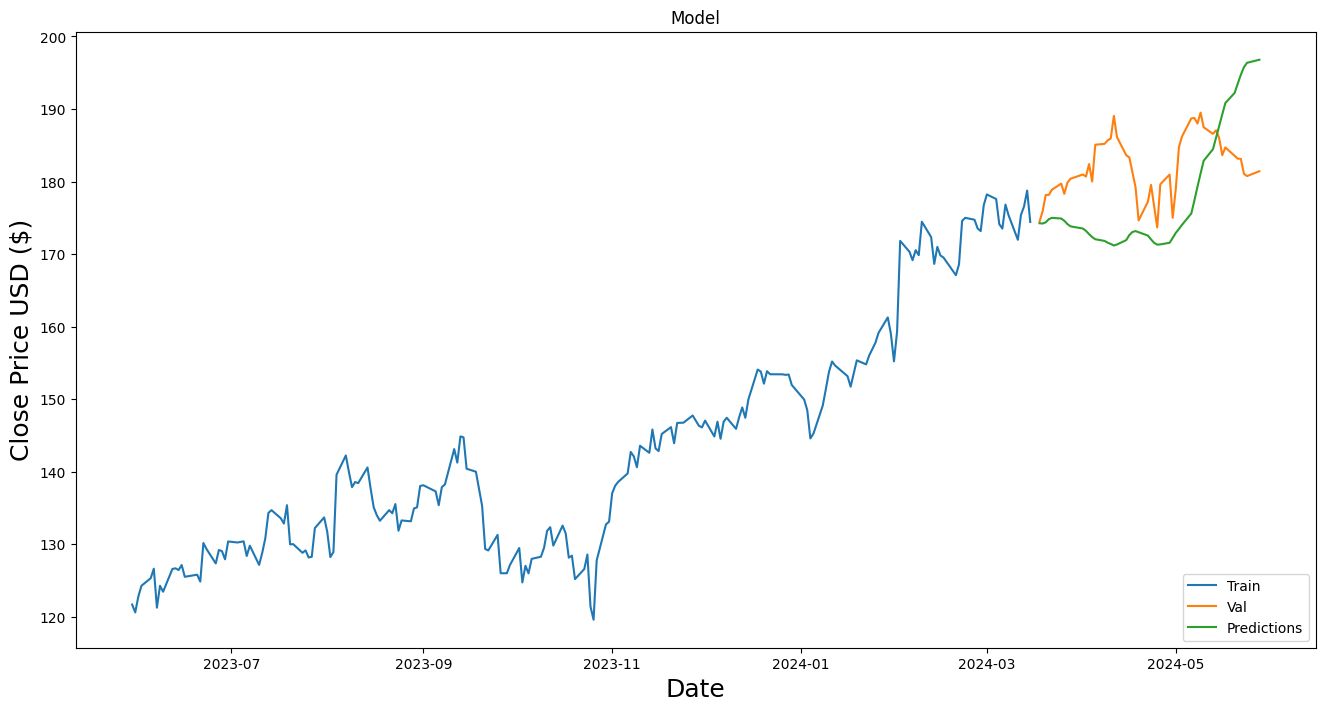

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-03-18  175.800003  176.690002  174.279999  174.479996  174.479996   
2024-03-19  174.220001  176.089996  173.520004  175.899994  175.899994   
2024-03-20  176.139999  178.529999  174.639999  178.149994  178.149994   
2024-03-21  179.990005  181.419998  178.149994  178.149994  178.149994   
2024-03-22  177.750000  179.259995  176.750000  178.869995  178.869995   
2024-03-25  178.009995  180.990005  177.240005  179.710007  179.710007   
2024-03-26  180.149994  180.449997  177.949997  178.300003  178.300003   
2024-03-27  179.880005  180.000000  177.309998  179.830002  179.830002   
2024-03-28  180.169998  181.699997  179.259995  180.380005  180.380005   
2024-04-01  180.789993  183.000000  179.949997  180.970001  180.970001   
2024-04-02  179.070007  180.789993  178.380005  180.690002  180.690002   
2024-04-03  179.899994  182.869995  17

In [69]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
print(valid)